In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
%matplotlib inline

In [17]:
def time_array(sampling_rate,sampling):
    arr=np.arange(sampling_rate,(sampling+1)*sampling_rate,sampling_rate)
    if arr.shape[0]>sampling:
        arr=np.arange(sampling_rate,(sampling+0.1)*sampling_rate,sampling_rate)
    return arr

## Anderson Model
## $\tau=\frac{\pi}{2}$
## $n=500$

In [24]:
#Path for the current directory
path=os.getcwd()
path_anderson=os.path.join(path,'anderson/Data_W')
print(path_anderson)

/home/icnfs/ma/g/gl1122/anderson/Data_W


### First Detection

In [11]:
W=np.arange(0,3.2,0.2)
W[0]=0.1
W=np.round(W,decimals=2)
t=0.5
sampling=500
anderson_detection={}
for w in W:
    print(w)
    filename=f"anderson:W={w},t={t},n={sampling}.h5"
    filename=os.path.join(path_anderson,filename)
    with h5py.File(filename,'r') as f:
        anderson_detection[w]=f['detection_time'][:]
    f.close

0.1
0.2
0.4
0.6
0.8
1.0
1.2
1.4
1.6
1.8
2.0
2.2
2.4
2.6
2.8
3.0


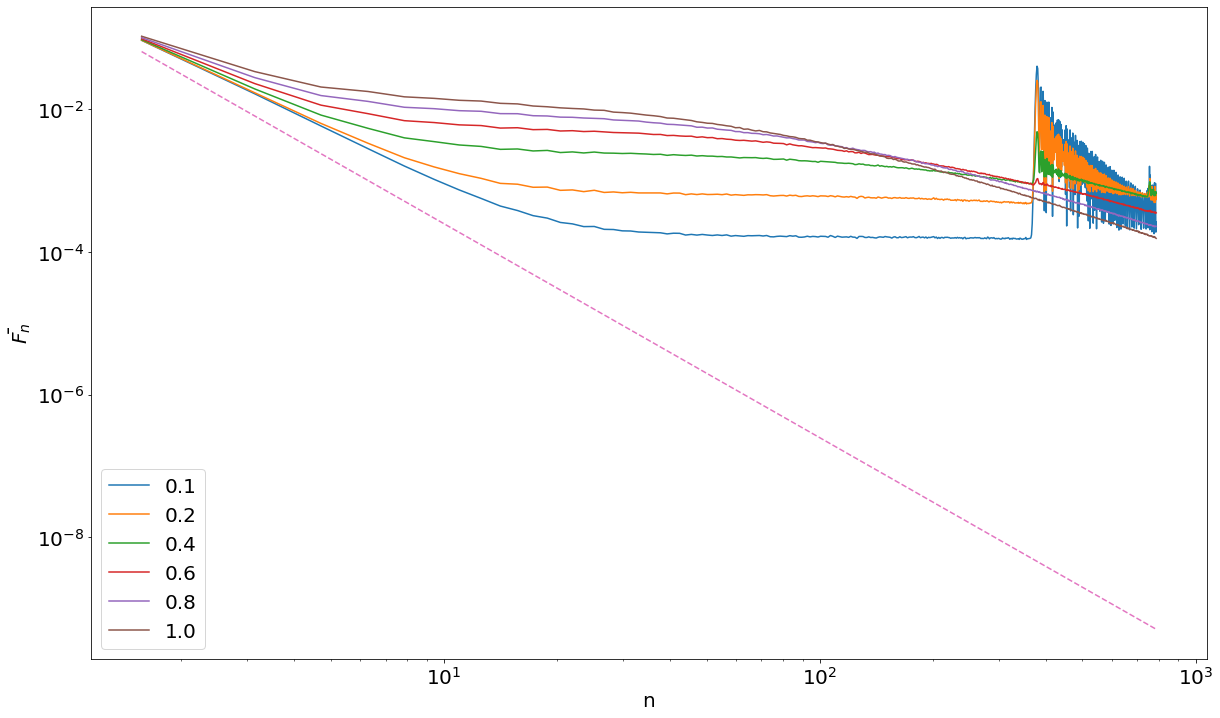

In [20]:
sampling_rate=np.pi*t
x=time_array(sampling_rate,sampling)
plt.figure(figsize=(20,12))
for w in W[:6]:
    plt.loglog(x,anderson_detection[w].mean(axis=0),label=f'{w}')
plt.legend(fontsize=20)
plt.xlabel('n',fontsize=20)
plt.ylabel(r'$\bar{F_n}$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
y=0.25*x**(-3)
plt.loglog(x,y,'--',label=r'$n^{-3}$')

(array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

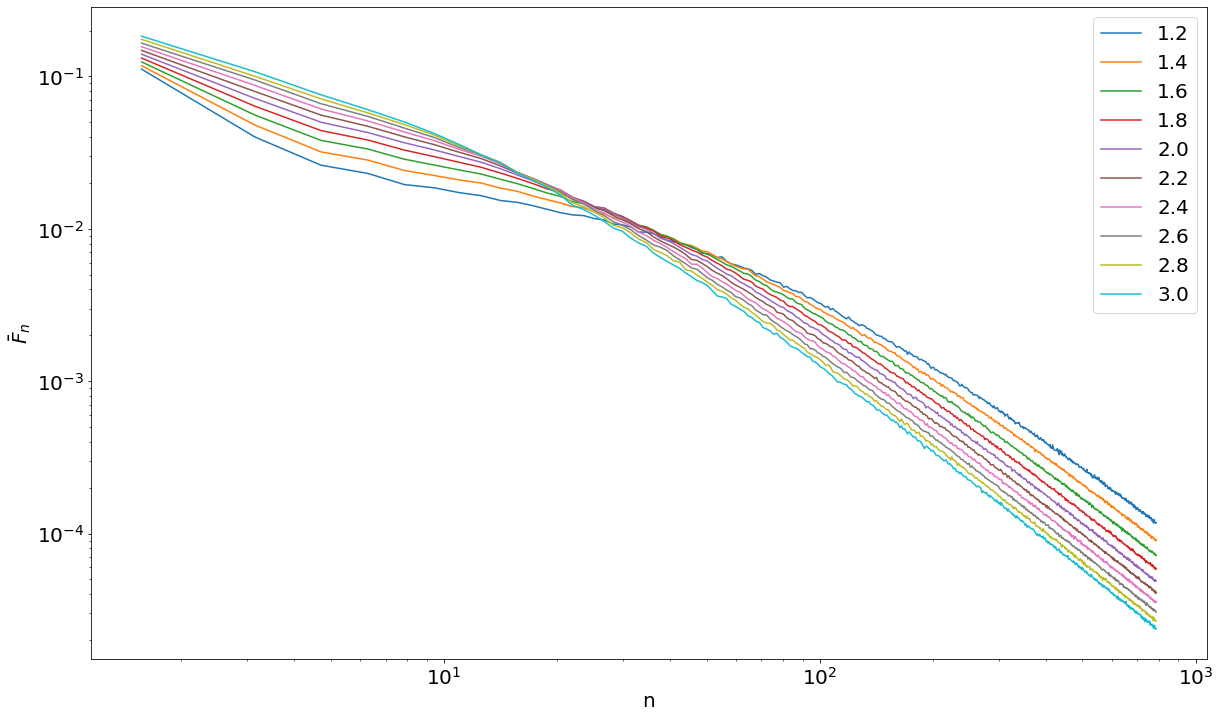

In [12]:
sampling_rate=np.pi*t
x=time_array(sampling_rate,sampling)
plt.figure(figsize=(20,12))
for w in W[6:]:
    plt.loglog(x,anderson_detection[w].mean(axis=0),label=f'{w}')
plt.legend(fontsize=20)
plt.xlabel('n',fontsize=20)
plt.ylabel(r'$\bar{F}_n$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [54]:
# Survival probability
S=[]
for w in W:
    S.append(1-np.sum(anderson_detection[w][:,:370].mean(axis=0)))

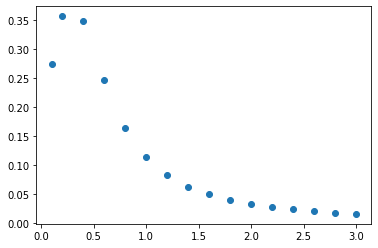

In [55]:
plt.plot(W,S,'o')   

### Loschmidt Echo


In [25]:
W=np.arange(0,3.2,0.2)
W[0]=0.1
W=np.round(W,decimals=2)
t=0.5
sampling=500
anderson_echo={}
for w in W:
    print(w)
    filename=f"anderson:W={w},t={t},n={sampling}.h5"
    filename=os.path.join(path_anderson,filename)
    with h5py.File(filename,'r') as f:
        anderson_echo[w]=f['Loschmidt Echo'][:]
    f.close

0.1
0.2
0.4
0.6
0.8
1.0
1.2
1.4
1.6
1.8
2.0
2.2
2.4
2.6
2.8
3.0


(array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

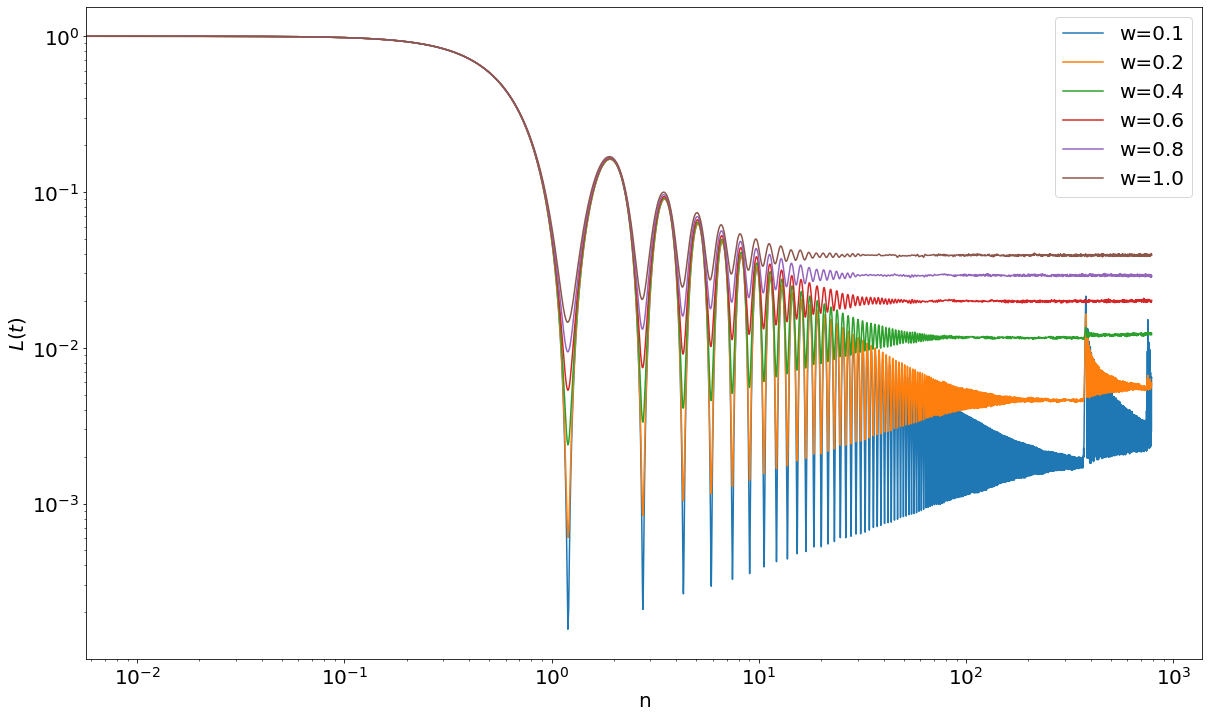

In [26]:
x_echo=np.arange(0,x[-1],0.01)
plt.figure(figsize=(20,12))
for w in W[:6]:
    plt.loglog(x_echo,anderson_echo[w].mean(axis=0),label=f'w={w}')
plt.legend(fontsize=20)
plt.xlabel('n',fontsize=20)
plt.ylabel(r'$L(t)$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

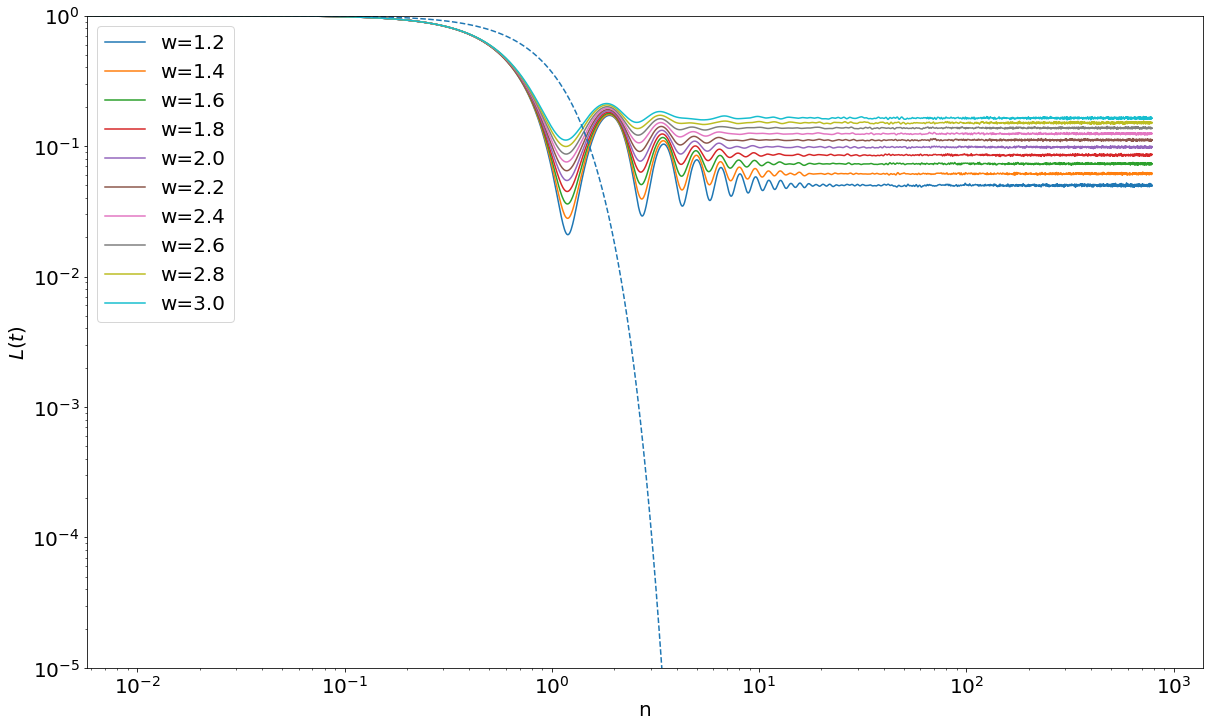

In [30]:
x_echo=np.arange(0,x[-1],0.01)
plt.figure(figsize=(20,12))
for w in W[6:]:
    plt.loglog(x_echo,anderson_echo[w].mean(axis=0),label=f'w={w}')
plt.legend(fontsize=20)
plt.xlabel('n',fontsize=20)
plt.ylabel(r'$L(t)$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(1e-5,1)
y=np.exp(-x_echo**2)
plt.loglog(x_echo,y,'--',label=r'$e^{-n^2}$')

### Off Diagonal

In [16]:
off_path=os.path.join(path,'off_diagonal/Desktop Data')
SD=[0.1,0.01,0.001,0.0001,0.5,0.25]
off_detection={}
for sd in SD:
    filename=f'data_sd_{sd}.h5'
    filename=os.path.join(off_path,filename)
    with h5py.File(filename,'r') as f:
        off_detection[sd]=f['detection_time'][:]
    f.close

OSError: Unable to open file (file signature not found)

[6.62773152e-48 1.50611894e-48 7.13560107e-49 ... 1.04087791e-32
 4.35452710e-34 9.57115998e-37]
0.9835850621979947


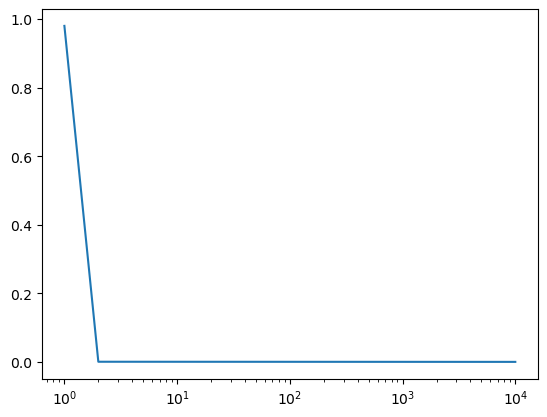

In [5]:
#Anderson Model
import numpy as np
import matplotlib.pyplot as plt
#Model
class anderson():
    def __init__(self,energy):
        self.energy=energy
        self.lattice_size=len(energy)
        self.H=self.hamiltonian(energy)
        self.Lambda,self.w=np.linalg.eigh(self.H)
    def hamiltonian(self,energy):
        I=np.ones(self.lattice_size-1)
        H=np.diagflat(I,1)+np.diagflat(I,-1)+np.diagflat(energy)
        H[self.lattice_size-1,0]=1
        H[0,self.lattice_size-1]=1
        return H
    def loschmidt_amplitude(self,time_array):
        eigenvalue_array=np.outer(time_array,self.Lambda)
        eigenvalue_array=np.exp(-1j*eigenvalue_array,dtype=np.complex_)
        eigenstate_vector=np.abs(self.w[0])**2
        u=eigenvalue_array@eigenstate_vector
        print(eigenstate_vector)
        return u
    def phi(self,amplitude):
        n=len(amplitude)
        phi=np.zeros(n,dtype=np.complex_)
        phi[0]=amplitude[0]
        for i in range(1,n):
            inverse=amplitude[:i][::-1]
            phi[i]=amplitude[i]-phi[:i]@inverse
        return phi
    def F_n(self,time_array):
        amplitude=self.loschmidt_amplitude(time_array)
        F=self.phi(amplitude)
        return np.abs(np.array(F))**2
#Running the script
#Parameters for first detection time 
W=0.1
sampling_rate=0.1
sampling=10000
#Time array
time=np.zeros(sampling)
elements=sampling_rate
for i in range(sampling):
    time[i]=elements
    elements+=sampling_rate
####
lattice_size=int(2.5*sampling*sampling_rate)
energy=np.random.uniform(-W/2,W/2,lattice_size)
model=anderson(energy)
F=model.F_n(time)
print(np.sum(F))
x=np.arange(1,sampling+1,1,dtype=np.float64)
plt.plot(x,F)
plt.xscale('log')